# House Prices Predicting

In [398]:
from IPython.display import display
pd.options.display.max_columns = None

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

from scipy import stats
from scipy.stats import skew,norm

### 데이터 불러오기 및 정리

In [2]:
# 데이터 불러오기
df_origin = pd.read_csv('train.csv')

In [3]:
# 컬럼 확인
df_origin.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
len(df_origin.columns)

81

In [4]:
# 분석에 필요없는 컬럼 'Id' 제거
df = df_origin.drop('Id', axis=1)

In [5]:
# 트레인셋 & 테스트셋 으로 분리
df_train, df_test = train_test_split(df, train_size= 0.7, test_size = 0.3)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 1103 to 312
Data columns (total 80 columns):
MSSubClass       1021 non-null int64
MSZoning         1021 non-null object
LotFrontage      844 non-null float64
LotArea          1021 non-null int64
Street           1021 non-null object
Alley            63 non-null object
LotShape         1021 non-null object
LandContour      1021 non-null object
Utilities        1021 non-null object
LotConfig        1021 non-null object
LandSlope        1021 non-null object
Neighborhood     1021 non-null object
Condition1       1021 non-null object
Condition2       1021 non-null object
BldgType         1021 non-null object
HouseStyle       1021 non-null object
OverallQual      1021 non-null int64
OverallCond      1021 non-null int64
YearBuilt        1021 non-null int64
YearRemodAdd     1021 non-null int64
RoofStyle        1021 non-null object
RoofMatl         1021 non-null object
Exterior1st      1021 non-null object
Exterior2nd      1021 non

In [50]:
# 예측값인 'SalePrice' 컬럼 내역 확인
df_train['SalePrice'].describe()

count      1021.000000
mean     182653.776690
std       79238.873752
min       37900.000000
25%      130000.000000
50%      165000.000000
75%      216837.000000
max      745000.000000
Name: SalePrice, dtype: float64

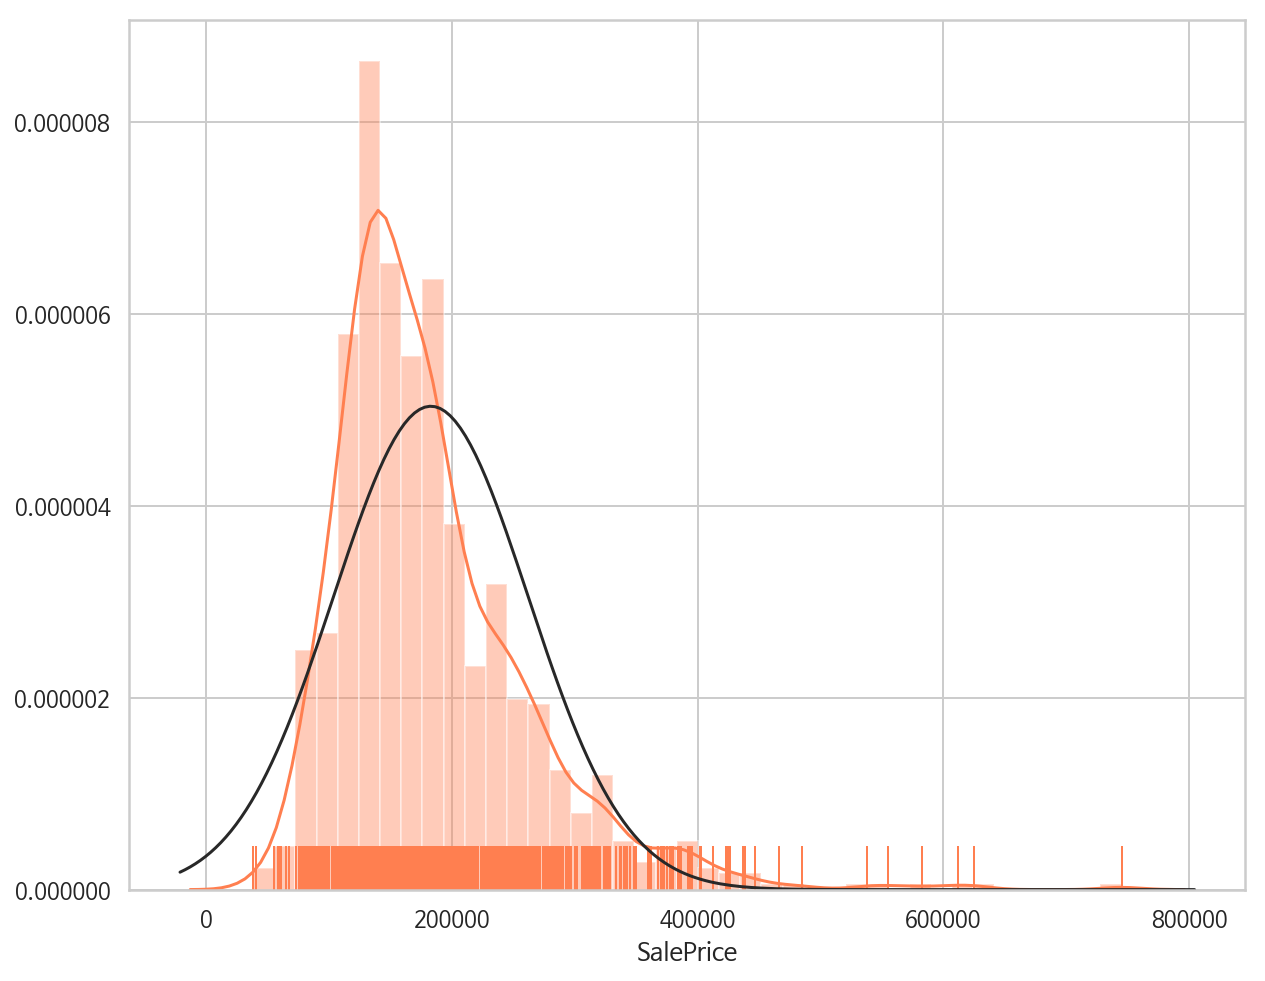

In [72]:
plt.figure(figsize=(10,8))
sns.distplot(df_train['SalePrice'], color='coral', fit=norm, rug=True)

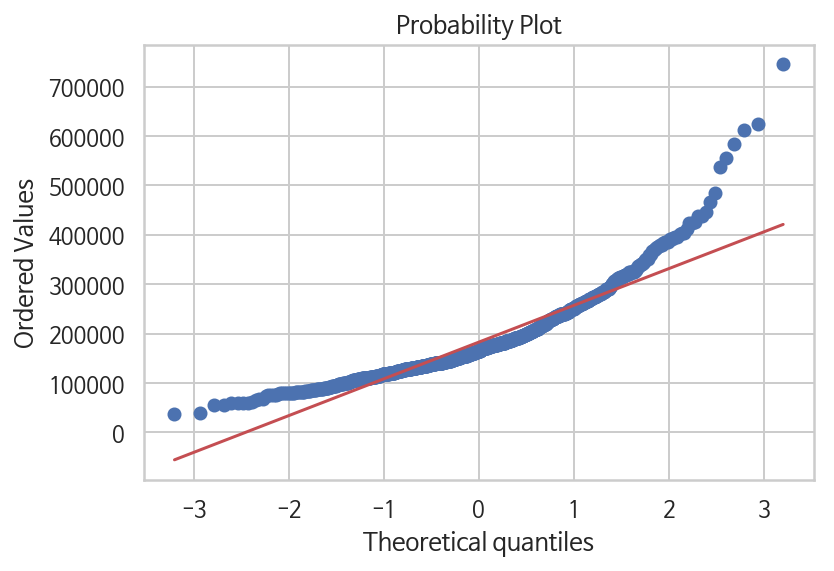

In [78]:
# normal distribution check
res = stats.probplot(df_train['SalePrice'], plot=plt)

### 데이터 상관관계

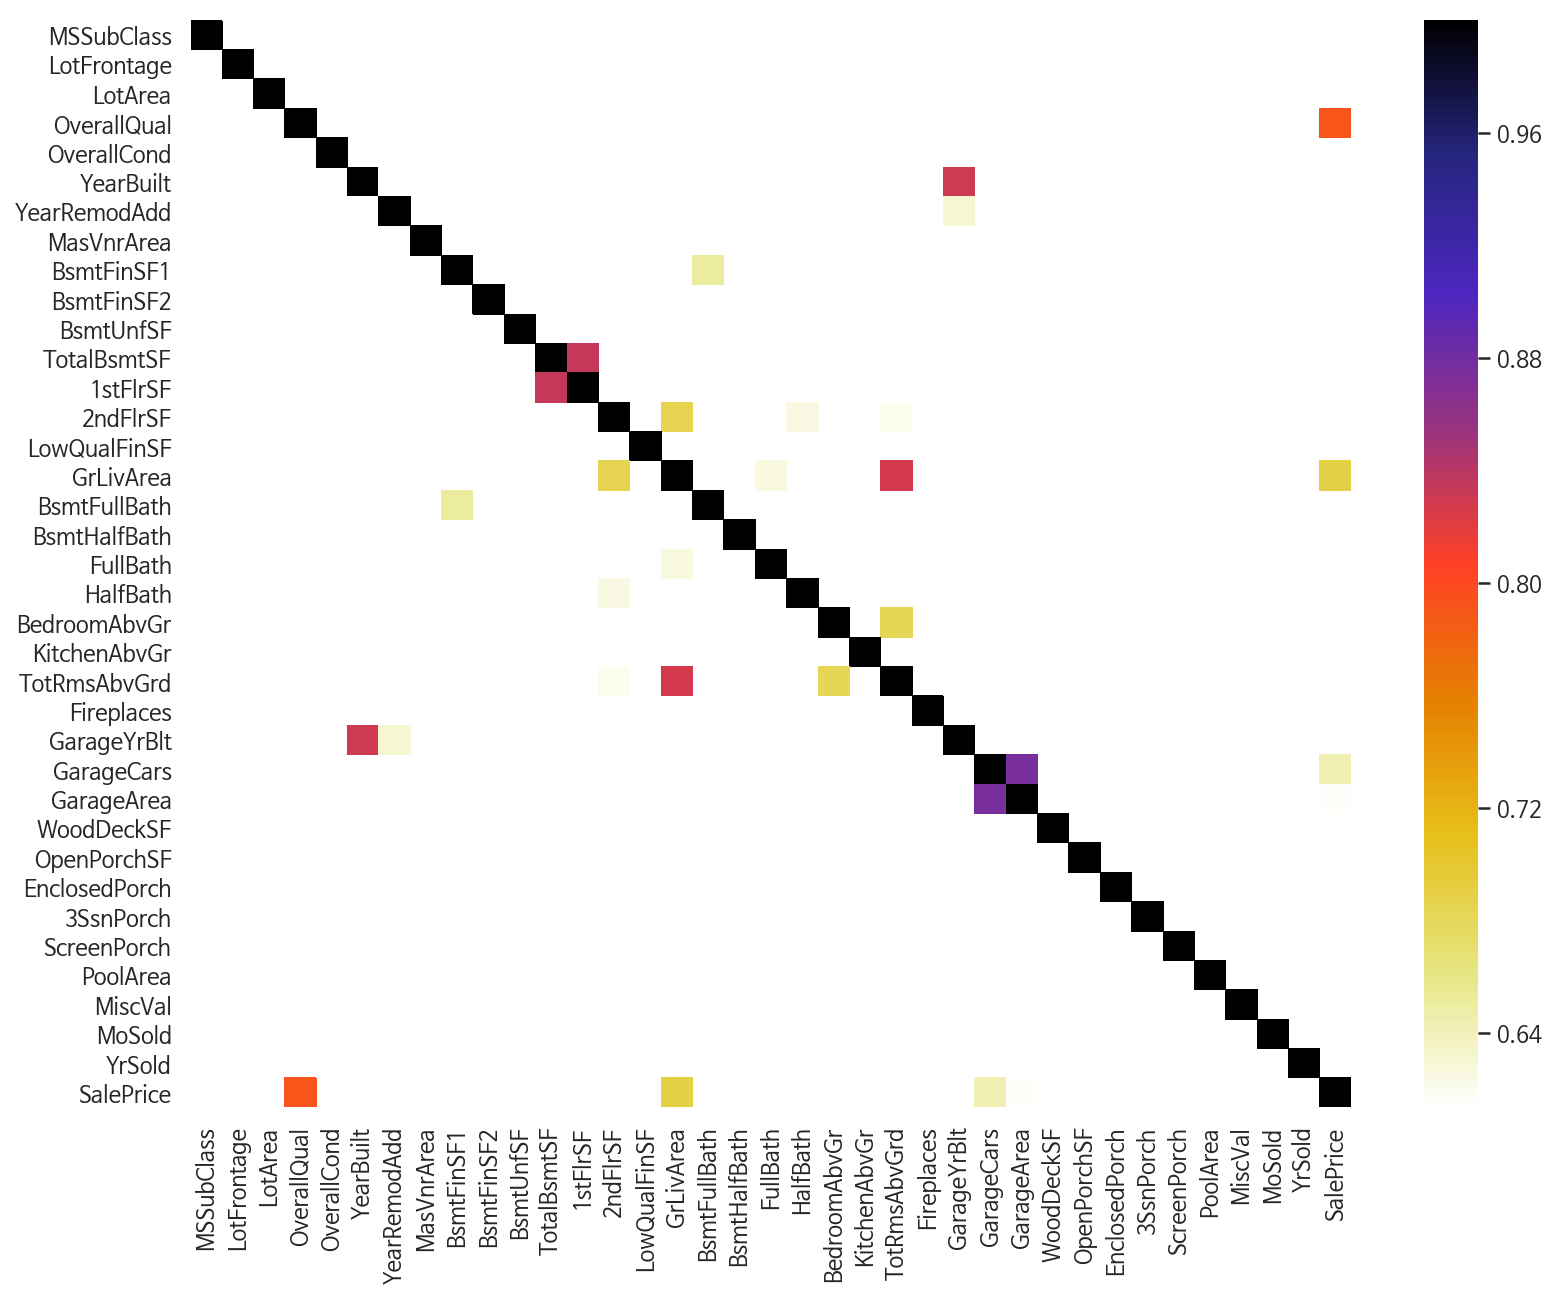

In [168]:
# 숫자형 변수끼리의 전체 상관관계 히트맵
plt.figure(figsize=(13,10))
df_corr = df_train.corr()
df_corr = df_corr.where(df_corr >= 0,   -df_corr) # 음의 상관관계에서도 높은 상관계수를 갖은 데이터를 히트맵으로 보기 위해 음수를 양수로 변경
sns.heatmap(df_corr.where(df_corr > 0.6), cmap="CMRmap_r") # 상관계수가 0.6 이상인 값만 히트맵에 표시

In [219]:
# 상관계수가 높은 조합 리스트
high_corr_list = []
for i in df_corr.columns:
    for j in df_corr.index[df_corr[i] > 0.6]:
        if (i != j) and (not sorted([i,j]) in high_corr_list) :
            high_corr_list.append(sorted([i,j]))
high_corr_list


[['OverallQual', 'SalePrice'],
 ['YearBuilt', 'YearRemodAdd'],
 ['GarageYrBlt', 'YearBuilt'],
 ['GarageYrBlt', 'YearRemodAdd'],
 ['BsmtFinSF1', 'BsmtFullBath'],
 ['1stFlrSF', 'TotalBsmtSF'],
 ['2ndFlrSF', 'GrLivArea'],
 ['2ndFlrSF', 'HalfBath'],
 ['2ndFlrSF', 'TotRmsAbvGrd'],
 ['FullBath', 'GrLivArea'],
 ['GrLivArea', 'TotRmsAbvGrd'],
 ['GrLivArea', 'SalePrice'],
 ['BedroomAbvGr', 'TotRmsAbvGrd'],
 ['GarageArea', 'GarageCars'],
 ['GarageCars', 'SalePrice'],
 ['GarageArea', 'SalePrice']]

상관관계 탑10 리스트:  Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


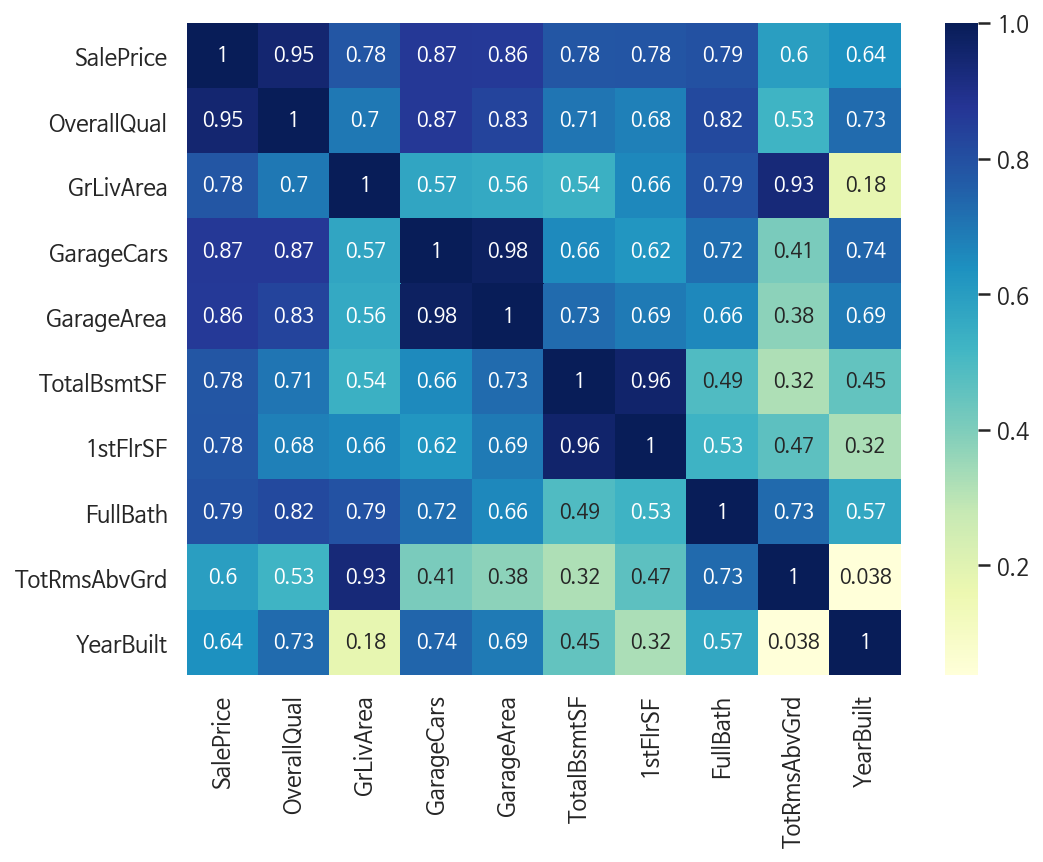

In [188]:
# 'SalePrice' 와 상관관계가 있는 컬럼 상위 10개 분류 
corrlist = df_corr.nlargest(10, 'SalePrice').index
print('상관관계 탑10 리스트: ',corrlist)
plt.figure(figsize=(8,6))
sns.heatmap(df_corr[corrlist].corr(), annot=True, cmap="YlGnBu")

### NaN값 처리

In [100]:
# NA값 있는 컬럼 확인 (19개)
col_null = df_train.count().index[df_train.count() != 1021]
col_null

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [311]:
# 컬럼별 NA값 내용 확인
na_list = df_train[col_null]
na_list

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
1103,79.0,NaN,None,0.0,TA,TA,Mn,ALQ,Unf,SBrkr,Fa,BuiltIn,1954.0,Fin,TA,TA,NaN,NaN,NaN
1418,71.0,NaN,None,0.0,TA,TA,No,BLQ,Rec,SBrkr,NaN,Detchd,1962.0,Unf,TA,TA,NaN,NaN,NaN
1223,89.0,NaN,BrkFace,44.0,TA,Fa,No,LwQ,Unf,FuseA,NaN,Detchd,1951.0,Unf,TA,TA,NaN,MnPrv,NaN
1380,45.0,Grvl,None,0.0,TA,Fa,No,Rec,Unf,FuseF,NaN,Detchd,1938.0,Unf,TA,Fa,NaN,NaN,NaN
1301,NaN,NaN,None,0.0,TA,TA,No,BLQ,Unf,SBrkr,Gd,Attchd,1942.0,Unf,TA,TA,NaN,NaN,NaN
1085,73.0,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,SBrkr,NaN,Attchd,1992.0,Unf,TA,TA,NaN,NaN,NaN
1328,60.0,Grvl,None,0.0,Gd,TA,No,LwQ,Unf,SBrkr,TA,Detchd,1920.0,Unf,Fa,TA,NaN,MnPrv,Shed
554,85.0,NaN,BrkFace,292.0,Gd,TA,No,GLQ,Unf,SBrkr,Gd,BuiltIn,2003.0,RFn,TA,TA,NaN,NaN,NaN
684,58.0,NaN,BrkFace,30.0,Gd,TA,No,Unf,Unf,SBrkr,NaN,Attchd,1998.0,Fin,TA,TA,NaN,NaN,NaN
92,80.0,Grvl,None,0.0,Gd,TA,No,ALQ,Unf,SBrkr,NaN,Detchd,1921.0,Unf,TA,TA,NaN,NaN,NaN


In [375]:
# NA처리: LotFrontage (도로와 인접한 쪽 집의 폭)

# NA 값을 미 측정치라고 가정하고 상관관계가 있는 다른 컬럼인 LotArea를 이용하여 두 컬럼의 비율을 적용해 NA 예측값을 대입
Lot_col = df_train[['LotFrontage','LotArea']]

# LotArea/LotFrontage 값을 Div 컬럼에 넣음
Lot_col['Div'] = Lot_col['LotArea']/Lot_col['LotFrontage']
Lot_col

,LotFrontage,LotArea,Div
1103,79.0,8910,112.784810
1418,71.0,9204,129.633803
1223,89.0,10680,120.000000
1380,45.0,8212,182.488889
1301,NaN,7500,NaN
1085,73.0,9069,124.232877
1328,60.0,10440,174.000000
554,85.0,10625,125.000000
684,58.0,16770,289.137931
92,80.0,13360,167.000000


In [376]:
Lot_col['Div'].describe()

count     844.000000
mean      144.264400
std        92.033852
min        54.166667
25%       115.247053
50%       129.271231
75%       149.720833
max      1434.966667
Name: Div, dtype: float64

In [378]:
print('Div값이 500 이상인 개수: ',len(Lot_col['Div'].dropna()[Lot_col['Div'].dropna() >= 500]))
# 500 을 기준으로 그 이상값들을 아웃라이어로 판단하고 제외
Lot_col['Div'].dropna()[Lot_col['Div'].dropna() < 500].describe()

Div값이 500 이상인 개수:  8


count    836.000000
mean     137.037015
std       47.061435
min       54.166667
25%      115.000000
50%      128.615789
75%      148.417978
max      446.608696
Name: Div, dtype: float64

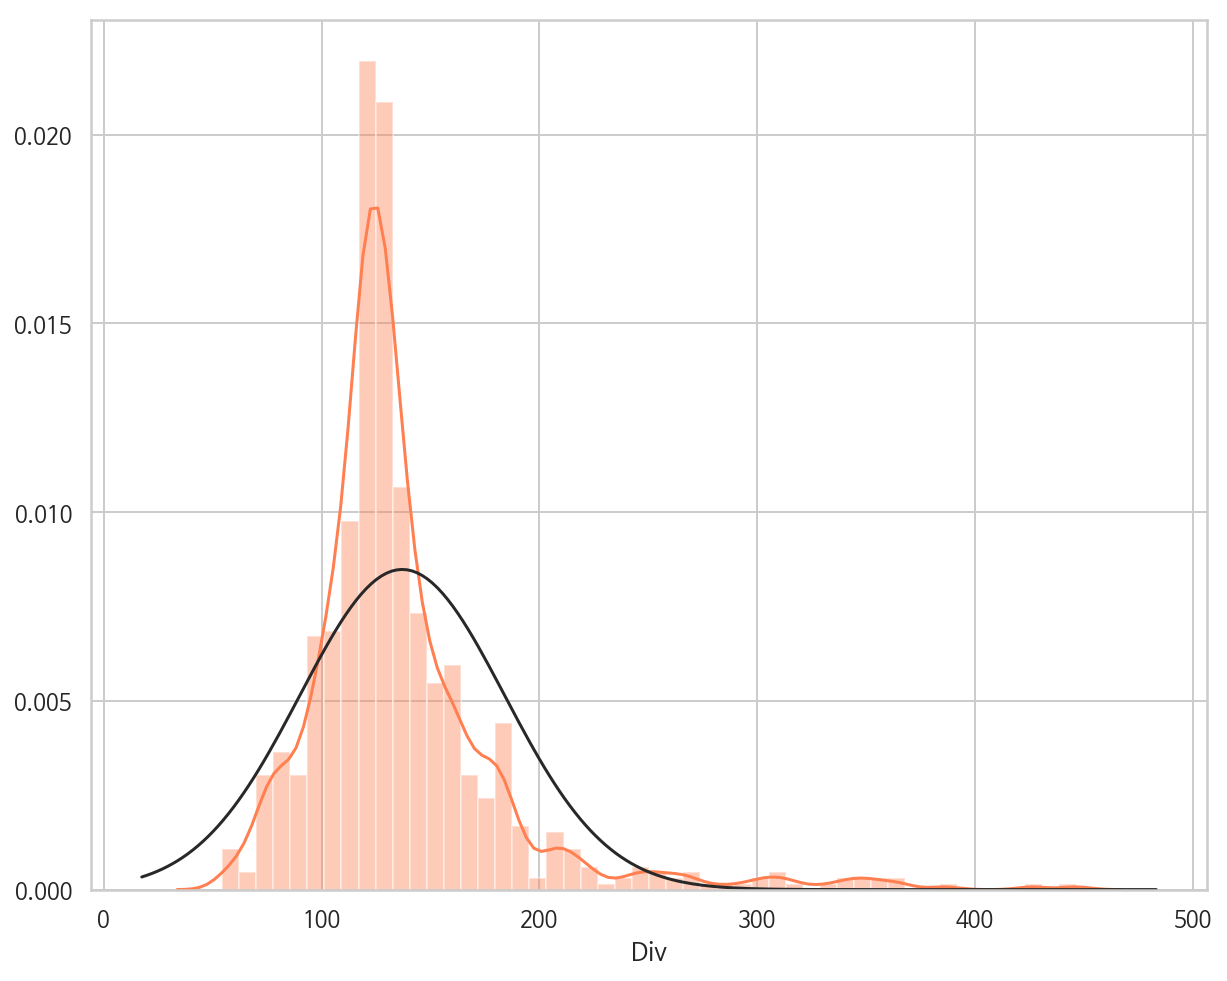

In [374]:
# 아웃라이어를 제외하고 분포그래프로 분포 확인
plt.figure(figsize=(10,8))
sns.distplot(Lot_col['Div'].dropna()[Lot_col['Div'].dropna() < 500], color='coral', fit=norm)

In [384]:
7500/Lot_mean

54.729738677663136

In [386]:
# 분류된 Div컬럼의 평균값을 이용해서 LotFrontage의 NA값을 예측하여 채움
Lot_mean = Lot_col['Div'].dropna()[Lot_col['Div'].dropna() < 500].mean()
na_list['LotFrontage'] = Lot_col['LotFrontage'].fillna(Lot_col['LotArea']/Lot_mean)

print('<처리후 NA 개수>\n',na_list['LotFrontage'].isna().sum())


<처리후 NA 개수>
 0


In [312]:
# NA처리: Alley (현관 들어오는 길 포장타입)
na_col = 'Alley'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값이 의미하는게 들어오는 길 자체가 없는것 이므로 NoAcss로 변경
na_list[na_col] = na_list[na_col].fillna('NoAcss')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Pave    32
Grvl    31
Name: Alley, dtype: int64

<NA 개수>
 958

<처리후 Value 종류>
 NoAcss    958
Pave       32
Grvl       31
Name: Alley, dtype: int64

<처리후 NA 개수>
 0


In [313]:
# NA처리: MasVnrType (골조 벽 덮게 타입) 
na_col = 'MasVnrType'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# 덮게 자체가 없다고 판단하여 None으로 변경
na_list[na_col] = na_list[na_col].fillna('None')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 None       602
BrkFace    304
Stone       98
BrkCmn      12
Name: MasVnrType, dtype: int64

<NA 개수>
 5

<처리후 Value 종류>
 None       607
BrkFace    304
Stone       98
BrkCmn      12
Name: MasVnrType, dtype: int64

<처리후 NA 개수>
 0


In [314]:
# NA처리: MasVnrArea (골조 벽 덮게 넓이) 
na_col = 'MasVnrArea'

print('<NA 개수>\n',na_list[na_col].isna().sum())

# MasVnrType을 None으로 바꿨기때문에 넓이도 0으로 변경
na_list[na_col] = na_list[na_col].fillna(0.0)
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<NA 개수>
 5

<처리후 NA 개수>
 0


In [315]:
# NA처리: BsmtQual (지하실 높이 점수)
na_col = 'BsmtQual'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Gd    448
TA    436
Ex     85
Fa     29
Name: BsmtQual, dtype: int64

<NA 개수>
 23

<처리후 Value 종류>
 Gd        448
TA        436
Ex         85
Fa         29
NoBsmt     23
Name: BsmtQual, dtype: int64

<처리후 NA 개수>
 0


In [316]:
# NA처리: BsmtCond (지하실 전체적 점수)
na_col = 'BsmtCond'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    916
Gd     49
Fa     31
Po      2
Name: BsmtCond, dtype: int64

<NA 개수>
 23

<처리후 Value 종류>
 TA        916
Gd         49
Fa         31
NoBsmt     23
Po          2
Name: BsmtCond, dtype: int64

<처리후 NA 개수>
 0


In [318]:
# NA처리: BsmtExposure (지하실 창문이 외부로 노출된 정도)
na_col = 'BsmtExposure'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 No    658
Av    146
Gd    103
Mn     90
Name: BsmtExposure, dtype: int64

<NA 개수>
 24

<처리후 Value 종류>
 No        658
Av        146
Gd        103
Mn         90
NoBsmt     24
Name: BsmtExposure, dtype: int64

<처리후 NA 개수>
 0


In [322]:
# NA처리: BsmtFinType1 (지하실 거주 가능 점수)
na_col = 'BsmtFinType1'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 GLQ    302
Unf    294
ALQ    152
BLQ    103
Rec     95
LwQ     52
Name: BsmtFinType1, dtype: int64

<NA 개수>
 23

<처리후 Value 종류>
 GLQ       302
Unf       294
ALQ       152
BLQ       103
Rec        95
LwQ        52
NoBsmt     23
Name: BsmtFinType1, dtype: int64

<처리후 NA 개수>
 0


In [325]:
# NA처리: BsmtFinType2 (지하실 거주 가능 점수, 여러 종류일경우)
na_col = 'BsmtFinType2'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 지하실이 없다는 뜻이므로 NoBsmt로 변경
na_list[na_col] = na_list[na_col].fillna('NoBsmt')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Unf    877
Rec     39
LwQ     38
BLQ     18
ALQ     15
GLQ     10
Name: BsmtFinType2, dtype: int64

<NA 개수>
 24

<처리후 Value 종류>
 Unf       877
Rec        39
LwQ        38
NoBsmt     24
BLQ        18
ALQ        15
GLQ        10
Name: BsmtFinType2, dtype: int64

<처리후 NA 개수>
 0


In [327]:
# NA처리: Electrical (전력 시스템 관련)
na_col = 'Electrical'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# 정보를 알수 없기때문에 새로운 카테고리 None 생성
na_list[na_col] = na_list[na_col].fillna('None')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 SBrkr    943
FuseA     57
FuseF     17
FuseP      2
Mix        1
Name: Electrical, dtype: int64

<NA 개수>
 1

<처리후 Value 종류>
 SBrkr    943
FuseA     57
FuseF     17
FuseP      2
None       1
Mix        1
Name: Electrical, dtype: int64

<처리후 NA 개수>
 0


In [329]:
# NA처리: FireplaceQu (벽난로 퀄리티)
na_col = 'FireplaceQu'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 벽난로가 없다는 뜻이므로 NoF로 변경
na_list[na_col] = na_list[na_col].fillna('NoF')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Gd    265
TA    232
Fa     25
Ex     16
Po     11
Name: FireplaceQu, dtype: int64

<NA 개수>
 472

<처리후 Value 종류>
 NoF    472
Gd     265
TA     232
Fa      25
Ex      16
Po      11
Name: FireplaceQu, dtype: int64

<처리후 NA 개수>
 0


In [332]:
# NA처리: GarageType (차고 위치)
na_col = 'GarageType'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Attchd     621
Detchd     268
BuiltIn     59
Basment     11
CarPort      5
2Types       5
Name: GarageType, dtype: int64

<NA 개수>
 52

<처리후 Value 종류>
 Attchd     621
Detchd     268
BuiltIn     59
NoGrage     52
Basment     11
CarPort      5
2Types       5
Name: GarageType, dtype: int64

<처리후 NA 개수>
 0


In [335]:
# NA처리: GarageYrBlt (차고 지어진 년도)
na_col = 'GarageYrBlt'

print('<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<NA 개수>
 52

<처리후 NA 개수>
 0


In [337]:
# NA처리: GarageFinish (차고 내부 인테리어 완성정도)
na_col = 'GarageFinish'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Unf    424
RFn    296
Fin    249
Name: GarageFinish, dtype: int64

<NA 개수>
 52

<처리후 Value 종류>
 Unf        424
RFn        296
Fin        249
NoGrage     52
Name: GarageFinish, dtype: int64

<처리후 NA 개수>
 0


In [339]:
# NA처리: GarageQual' (차고 퀄리티)
na_col = 'GarageQual'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    917
Fa     36
Gd     11
Po      3
Ex      2
Name: GarageQual, dtype: int64

<NA 개수>
 52

<처리후 Value 종류>
 TA         917
NoGrage     52
Fa          36
Gd          11
Po           3
Ex           2
Name: GarageQual, dtype: int64

<처리후 NA 개수>
 0


In [341]:
# NA처리: GarageCond (차고 상태)
na_col = 'GarageCond'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 차고가 없다는 뜻이므로 NoGrage로 변경
na_list[na_col] = na_list[na_col].fillna('NoGrage')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 TA    926
Fa     30
Gd      7
Po      4
Ex      2
Name: GarageCond, dtype: int64

<NA 개수>
 52

<처리후 Value 종류>
 TA         926
NoGrage     52
Fa          30
Gd           7
Po           4
Ex           2
Name: GarageCond, dtype: int64

<처리후 NA 개수>
 0


In [343]:
# NA처리: PoolQC (수영장 퀄리티)
na_col = 'PoolQC'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 수영장이 없다는 뜻이므로 NoPool로 변경
na_list[na_col] = na_list[na_col].fillna('NoPool')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Fa    2
Gd    2
Ex    1
Name: PoolQC, dtype: int64

<NA 개수>
 1016

<처리후 Value 종류>
 NoPool    1016
Fa           2
Gd           2
Ex           1
Name: PoolQC, dtype: int64

<처리후 NA 개수>
 0


In [345]:
# NA처리: Fence (울타리 퀄리티)
na_col = 'Fence'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 울타리가 없다는 뜻이므로 NoFnc로 변경
na_list[na_col] = na_list[na_col].fillna('NoFnc')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 MnPrv    98
GdPrv    41
GdWo     40
MnWw      8
Name: Fence, dtype: int64

<NA 개수>
 834

<처리후 Value 종류>
 NoFnc    834
MnPrv     98
GdPrv     41
GdWo      40
MnWw       8
Name: Fence, dtype: int64

<처리후 NA 개수>
 0


In [347]:
# NA처리: MiscFeature (기타 특징들)
na_col = 'MiscFeature'

print('<Value 종류>\n',na_list[na_col].value_counts())
print('\n<NA 개수>\n',na_list[na_col].isna().sum())

# NA 값의 의미가 기타 특징이 없다는 뜻이므로 Nothing로 변경
na_list[na_col] = na_list[na_col].fillna('Nothing')
print('\n<처리후 Value 종류>\n',na_list[na_col].value_counts())
print('\n<처리후 NA 개수>\n',na_list[na_col].isna().sum())

<Value 종류>
 Shed    37
Gar2     1
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

<NA 개수>
 981

<처리후 Value 종류>
 Nothing    981
Shed        37
Gar2         1
TenC         1
Othr         1
Name: MiscFeature, dtype: int64

<처리후 NA 개수>
 0


In [390]:
# 전체 NA 처리 확인
na_list.isna().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [396]:
# df_train 으로 NA값 정리한 데이터 이동
for i in col_null:
    df_train[i] = na_list[i]
df_train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

### categorical와 quantitative 항목 분류

In [399]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1103,20,RL,79.000000,8910,Pave,NoAcss,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,655,Unf,0,0,655,GasA,Ex,Y,SBrkr,1194,0,0,1194,0,1,1,0,3,1,TA,6,Typ,1,Fa,BuiltIn,1954,Fin,2,539,TA,TA,Y,0,0,192,0,0,0,NoPool,NoFnc,Nothing,0,7,2006,WD,Normal,159500
1418,20,RL,71.000000,9204,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,25,Rec,872,247,1144,GasA,TA,Y,SBrkr,1144,0,0,1144,1,0,1,1,3,1,TA,6,Typ,0,NoF,Detchd,1962,Unf,1,336,TA,TA,Y,0,88,0,0,0,0,NoPool,NoFnc,Nothing,0,8,2008,COD,Normal,124000
1223,20,RL,89.000000,10680,Pave,NoAcss,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,44.0,TA,TA,CBlock,TA,Fa,No,LwQ,756,Unf,0,1380,2136,GasA,TA,N,FuseA,2136,0,0,2136,0,0,2,0,4,1,TA,7,Mod,0,NoF,Detchd,1951,Unf,2,528,TA,TA,Y,0,30,0,0,0,0,NoPool,MnPrv,Nothing,0,10,2006,WD,Normal,137900
1380,30,RL,45.000000,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,Fa,BrkTil,TA,Fa,No,Rec,203,Unf,0,661,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NoF,Detchd,1938,Unf,1,200,TA,Fa,Y,0,0,96,0,0,0,NoPool,NoFnc,Nothing,0,6,2010,WD,Normal,58500
1301,70,RL,54.729739,7500,Pave,NoAcss,IR1,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,7,1942,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,547,Unf,0,224,771,GasA,Fa,Y,SBrkr,753,741,0,1494,0,0,1,0,3,1,Gd,7,Typ,2,Gd,Attchd,1942,Unf,1,213,TA,TA,P,0,0,0,0,224,0,NoPool,NoFnc,Nothing,0,11,2009,WD,Normal,177500


In [413]:
col_cat = []
col_quan = []
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        col_cat.append(i)
    else:
        col_quan.append(i)
print(len(col_cat))
print(len(col_quan))
    

44
36


### 각 컬럼별 분석 및 수정

In [414]:
df_train[col_quan]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1103,20,79.000000,8910,6,6,1959,1959,0.0,655,0,0,655,1194,0,0,1194,0,1,1,0,3,1,6,1,2,539,0,0,192,0,0,0,0,7,2006,159500
1418,20,71.000000,9204,5,5,1963,1963,0.0,25,872,247,1144,1144,0,0,1144,1,0,1,1,3,1,6,0,1,336,0,88,0,0,0,0,0,8,2008,124000
1223,20,89.000000,10680,5,3,1951,1951,44.0,756,0,1380,2136,2136,0,0,2136,0,0,2,0,4,1,7,0,2,528,0,30,0,0,0,0,0,10,2006,137900
1380,30,45.000000,8212,3,3,1914,1950,0.0,203,0,661,864,864,0,0,864,1,0,1,0,2,1,5,0,1,200,0,0,96,0,0,0,0,6,2010,58500
1301,70,54.729739,7500,6,7,1942,1950,0.0,547,0,224,771,753,741,0,1494,0,0,1,0,3,1,7,2,1,213,0,0,0,0,224,0,0,11,2009,177500
1085,85,73.000000,9069,6,6,1992,1992,0.0,747,0,189,936,996,0,0,996,1,0,1,0,2,1,5,0,2,564,120,0,0,0,0,0,0,4,2010,147000
1328,50,60.000000,10440,6,7,1920,1950,0.0,493,0,1017,1510,1584,1208,0,2792,0,0,2,0,5,1,8,2,2,520,0,547,0,0,480,0,1150,6,2008,256000
554,60,85.000000,10625,7,5,2003,2004,292.0,866,0,132,998,1006,1040,0,2046,1,0,2,1,3,1,8,1,3,871,320,62,0,0,0,0,0,8,2008,284000
684,60,58.000000,16770,7,5,1998,1998,30.0,0,0,1195,1195,1195,644,0,1839,0,0,2,1,4,1,7,0,2,486,0,81,0,0,0,0,0,6,2010,221000
92,30,80.000000,13360,5,7,1921,2006,0.0,713,0,163,876,964,0,0,964,1,0,1,0,2,1,5,0,2,432,0,0,44,0,0,0,0,8,2009,163500
